Librerias:

In [76]:
!pip install seaborn

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Analisis Exploratorio

Arreglar fechas de la data base

In [78]:
df = pd.read_csv("./Datos/shampoo.csv")
df['Month'] = pd.to_datetime(df['Month'], format="%m-%y")
df.head()

,Month,Sales
0,2001-01-01,266.0
1,2002-01-01,145.9
2,2003-01-01,183.1
3,2004-01-01,119.3
4,2005-01-01,180.3


In [79]:
#Descripcion basica de datos
df.describe()

,Month,Sales
count,36,36.000000
mean,2006-08-01 14:00:00,312.600000
min,2001-01-01 00:00:00,119.300000
25%,2003-10-16 12:00:00,192.450000
50%,2006-08-01 00:00:00,280.150000
75%,2009-05-16 12:00:00,411.100000
max,2012-03-01 00:00:00,682.000000
std,NaN,148.937164


c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn

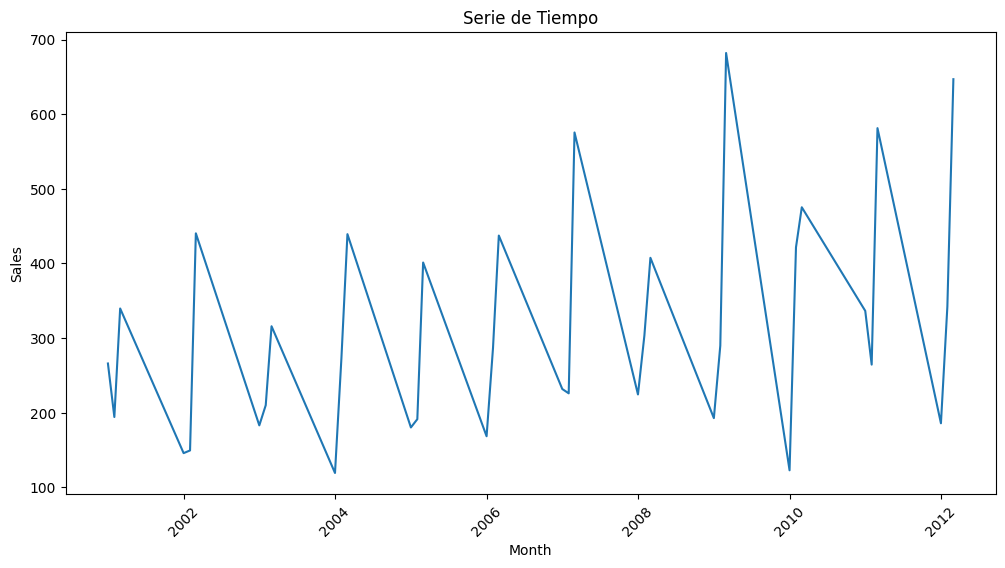

In [80]:
#Serie de tiempo

plt.figure(figsize=(12, 6))  
sns.lineplot(x="Month", y="Sales", data=df)
plt.title("Serie de Tiempo")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)  
plt.show()

# Promedios

c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\seaborn

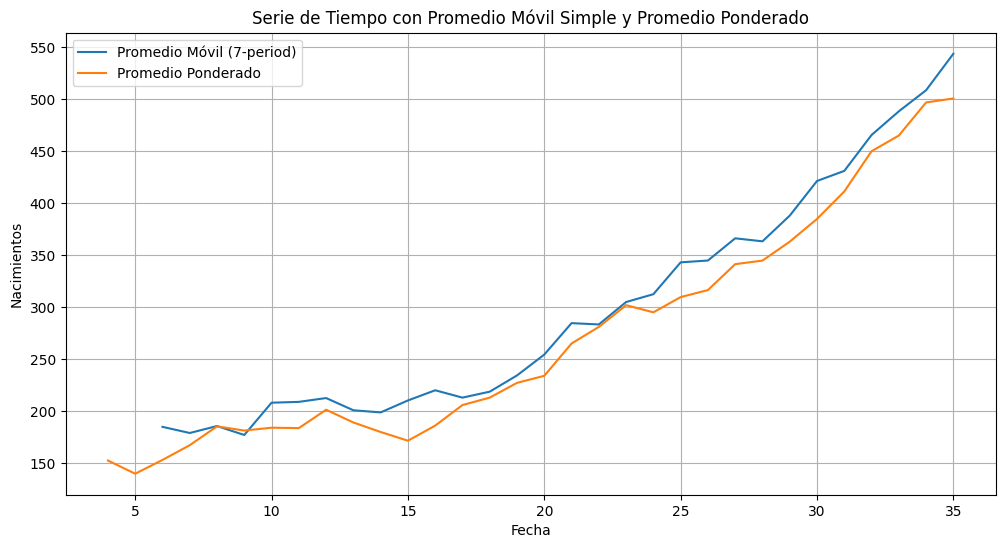

In [81]:
# Calcula el promedio móvil simple con una ventana de tamaño 7
window_size = 7
df['promedio_movil'] = df['Sales'].rolling(window=window_size).mean()

# Calcula un promedio ponderado
weights = [0.1, 0.2, 0.3, 0.2, 0.1]  # Ponderaciones para el promedio ponderado
df['promedio_ponderado'] = df['Sales'].rolling(window=len(weights)).apply(lambda x: (x * weights).sum())

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Grafica el promedio móvil simple
sns.lineplot(x=df.index, y='promedio_movil', data=df, label=f'Promedio Móvil ({window_size}-period)')

# Grafica el promedio ponderado
sns.lineplot(x=df.index, y='promedio_ponderado', data=df, label='Promedio Ponderado')

plt.title('Serie de Tiempo con Promedio Móvil Simple y Promedio Ponderado')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()

# SARIMA

c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -161.866
Date:                           Mon, 04 Sep 2023   AIC                            333.732
Time:                                   13:29:35   BIC                            340.393
Sample:                                        0   HQIC                           335.768
                                            - 36                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7427      0.157     -4.719      0.000      -1.051      -0.434
ma.L1         -0.4036      0.216     -1.872

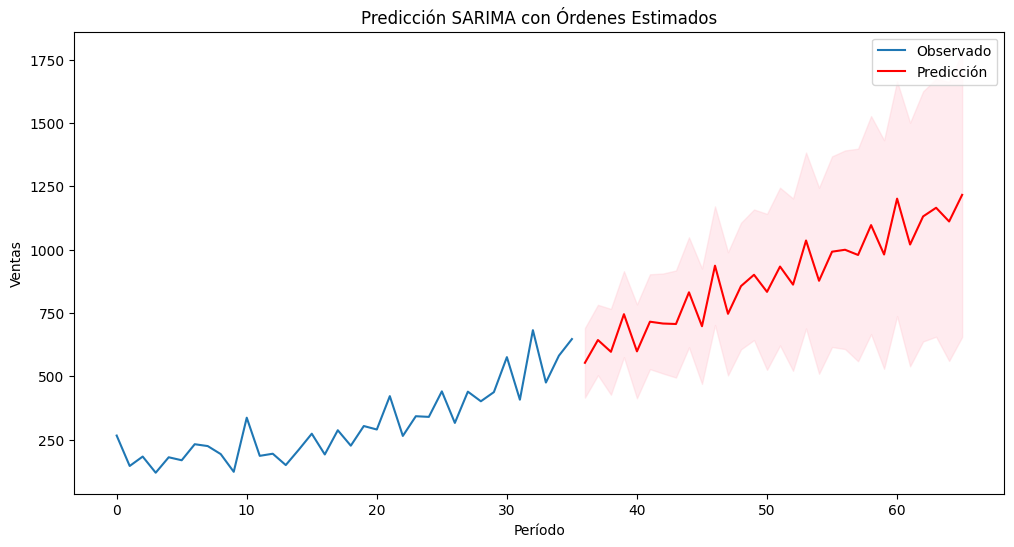

In [82]:
# Ajustar un modelo SARIMA utilizando los órdenes estimados
p, d, q = 1, 1, 1  # Órdenes para el componente ARIMA
P, D, Q, S = 1, 1, 1, 7  # Órdenes para el componente estacional

model = sm.tsa.SARIMAX(df['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Ver el resumen del modelo
print(results.summary())

# Realizar predicciones
forecast_period = 30  # Número de períodos a predecir
forecast = results.get_forecast(steps=forecast_period)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Convertir el índice de fechas en una secuencia de números enteros
date_integer_index = range(len(df), len(df) + forecast_period)
forecast_mean.index = date_integer_index
forecast_ci.index = date_integer_index

# Crear un índice de fechas para las predicciones
date_index = pd.date_range(start=df.index[-1], periods=forecast_period + 1, freq='D')[1:]

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(range(len(df)), df['Sales'], label='Observado')
plt.plot(date_integer_index, forecast_mean.values, label='Predicción', color='red')
plt.fill_between(date_integer_index, forecast_ci['lower Sales'], forecast_ci['upper Sales'], color='pink', alpha=0.3)
plt.xlabel('Período')
plt.ylabel('Ventas')
plt.legend()
plt.title('Predicción SARIMA con Órdenes Estimados')
plt.show()

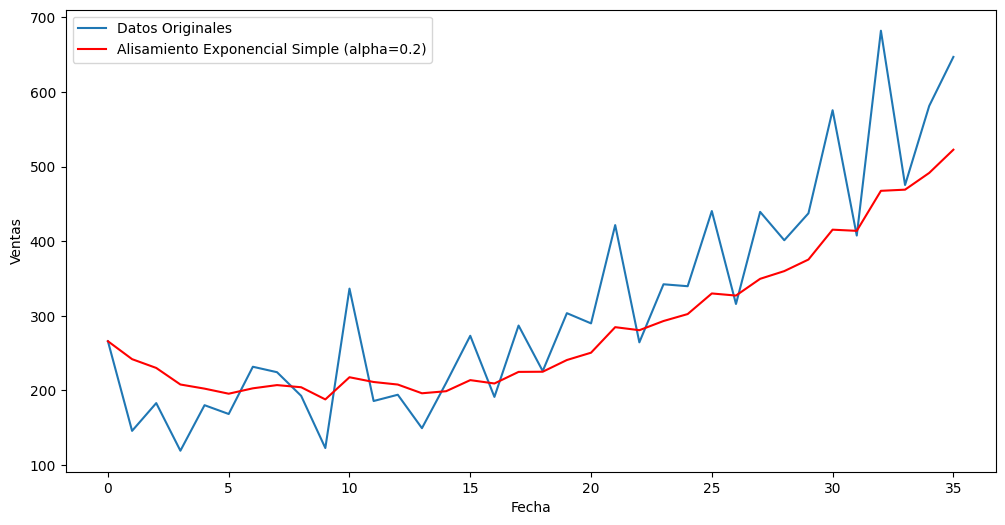

In [83]:
# Parámetro alpha (factor de suavizado)
alpha = 0.2  # Puedes ajustar este valor según tus necesidades

# Aplicar el alisamiento exponencial simple
df['Exponential_Smooth'] = df['Sales'].ewm(alpha=alpha, adjust=False).mean()

# Visualizar los datos originales y el alisamiento
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Datos Originales')
plt.plot(df.index, df['Exponential_Smooth'], label=f'Alisamiento Exponencial Simple (alpha={alpha})', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Prophet

13:29:35 - cmdstanpy - INFO - Chain [1] start processing
13:29:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


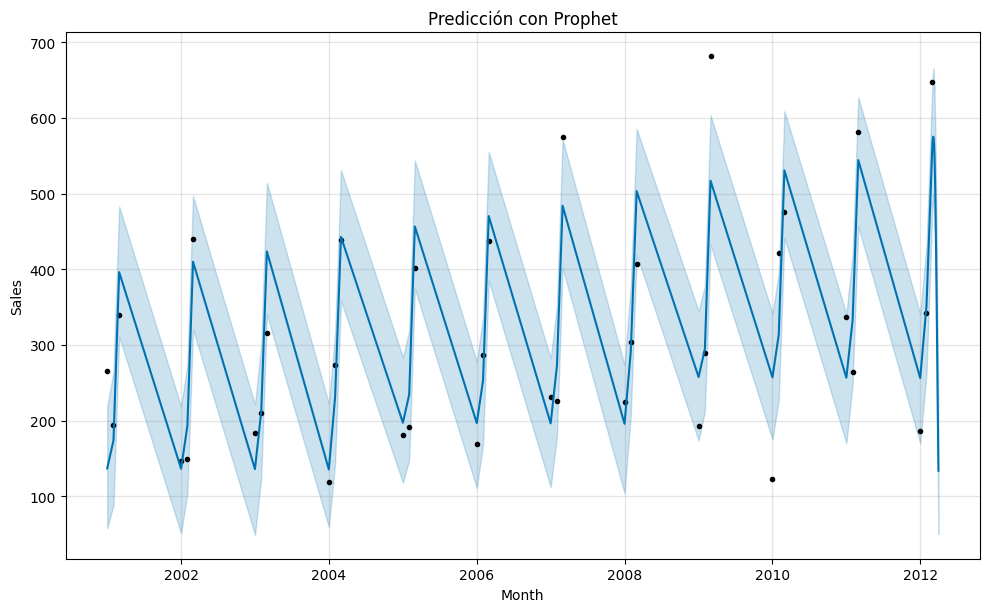

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
data = df.rename(columns={'Month': 'ds', 'Sales': 'y'})  # Cambiar el nombre de las columnas

# Crear y ajustar el modelo de Prophet
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=30)  # 30 días adicionales para predecir
forecast = model.predict(future)
fig = model.plot(forecast)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Predicción con Prophet')
plt.show()

# Redes Neuronales

In [97]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl (9.3 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.1207
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1153
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1099
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1046
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0992
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0938
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0884
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0830
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0776
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0723
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0670
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0617
Epoch 13/100
1/1 [==============================] - 0s 7ms/s

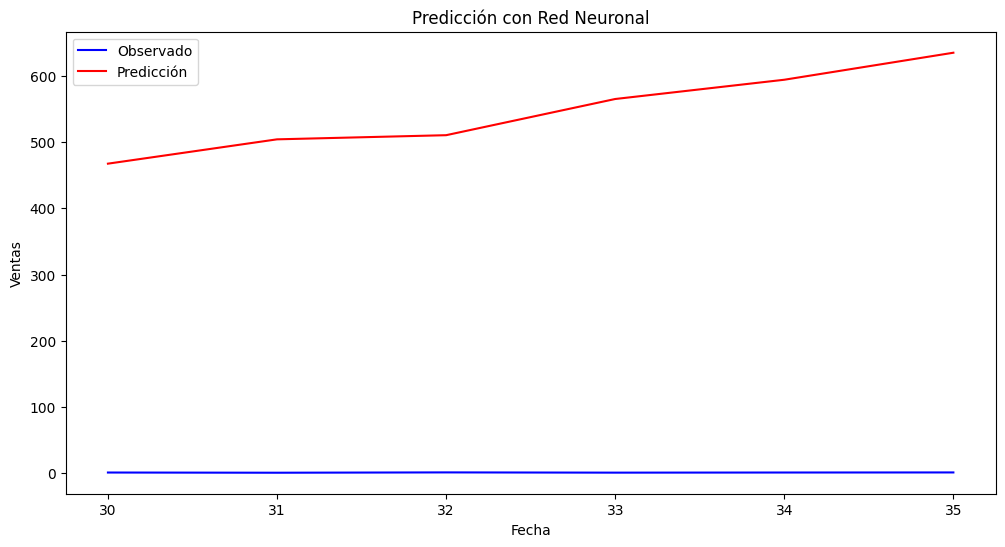

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos
scaler = MinMaxScaler()
df['Sales'] = scaler.fit_transform(df['Sales'].values.reshape(-1, 1))

# Crear secuencias temporales para el entrenamiento
sequence_length = 10  # Longitud de la secuencia temporal
sequences = []
target = []

for i in range(len(df) - sequence_length):
    seq = df['Sales'].values[i:i+sequence_length]
    label = df['Sales'].values[i+sequence_length]
    sequences.append(seq)
    target.append(label)

sequences = np.array(sequences)
target = np.array(target)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

# Crear el modelo de red neuronal
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluar el modelo en datos de prueba
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en datos de prueba: {loss}')

# Realizar predicciones
predictions = model.predict(X_test)

# Deshacer la normalización en las predicciones
predictions = scaler.inverse_transform(predictions)

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size+sequence_length:], y_test, label='Observado', color='blue')
plt.plot(df.index[train_size+sequence_length:], predictions, label='Predicción', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicción con Red Neuronal')
plt.legend()
plt.show()

# Comparacion y evaluacion

c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\andre\OneDrive\Documentos\GitHub\CC3084_Laboratorio3\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE: 0.3020354591812259
MAE: 0.27099724204499215


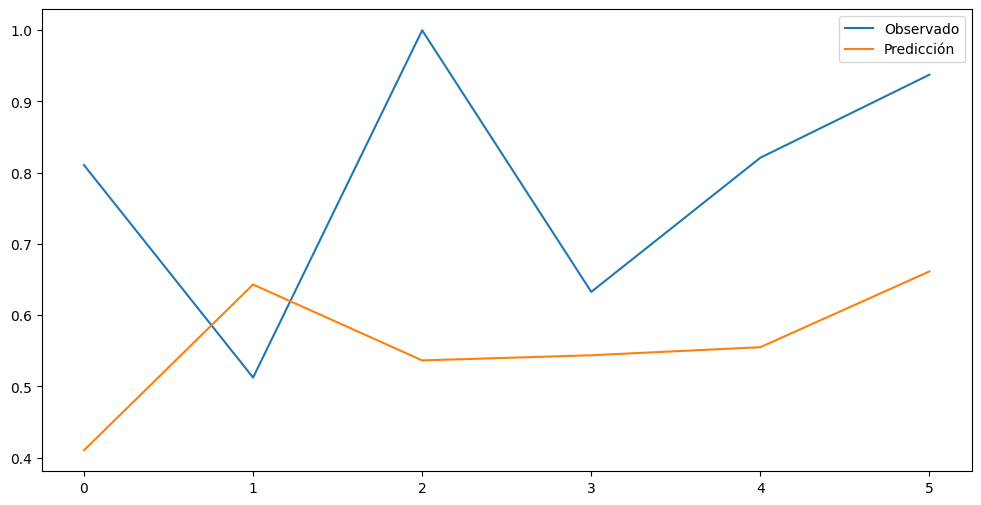

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the SARIMA model
model = sm.tsa.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(X_test))
y_pred = forecast.predicted_mean

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Observado")
plt.plot(y_pred, label="Predicción")
plt.legend()
plt.show()


# Comparación y Evaluación

En este caso particular, SARIMA demostró ser el método más efectivo de los cuatro mencionados para predecir series temporales en una situación específica. La fortaleza principal de SARIMA radica en su capacidad precisa y sólida para capturar patrones estacionales y tendencias presentes en los datos. Este modelo logra esto mediante la combinación de componentes auto-regresivos, de promedio móvil y de diferenciación, lo que le permite adaptarse eficazmente a una amplia gama de series temporales. Además, SARIMA ofrece la flexibilidad de ajustar manualmente sus parámetros, lo que lo convierte en una opción versátil para abordar situaciones complicadas. 